In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
print(plt.style.available)
plt.style.use('seaborn-white')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
# save a image
# plt.savefig('vegetables prices through thr year')

# EX Sheet 1 & 2

In [4]:
df=pd.read_csv('.\\OneDrive\\Desktop\\Accounting\\Data Scientist\\spyder data visualization\\Sheet1E1.csv')
#print(df.head())

In [5]:
df['HPAB']=df['Hits']/df['AtBase']
df.head()

,Unnamed: 0,Games,AtBase,Hits,HPAB
0,0,1,4,0,0.000000
1,1,25,118,32,0.271186
2,2,29,137,40,0.291971
3,3,27,133,44,0.330827
4,4,25,120,39,0.325000


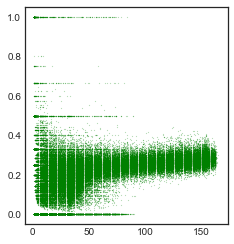

In [6]:
fig=plt.figure(figsize=(8,4))
ax=fig.add_subplot(121)
plt.scatter(df['Games'],df['HPAB'],c='g',s=.01)
plt.show()

In [7]:
df2=pd.read_csv('.\\OneDrive\\Desktop\\Accounting\\Data Scientist\\spyder data visualization\\Sheet1E2.csv')
df2['HPABY']=df['Hits']/df['AtBase']
df2.head()


,Unnamed: 0,Year,AtBase,Hits,HPABY
0,0,1884,151,28,0.000000
1,1,1885,121,23,0.271186
2,2,1886,167,33,0.291971
3,3,1887,150,46,0.330827
4,4,1888,51,17,0.325000


<ipython-input-8-8da2d5c77b70>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(new_major_ticks)
<ipython-input-8-8da2d5c77b70>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(new_minor_ticks, minor=True)


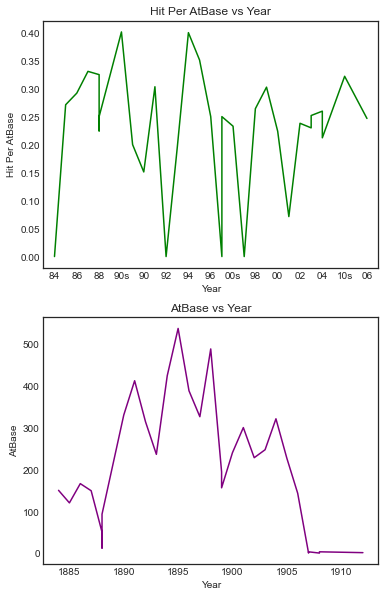

In [8]:
fig=plt.figure(figsize=(6,10))
ax1=fig.add_subplot(211)
plt.plot(df2['Year'],df2['HPABY'],c='g')
plt.xlabel('Year')
plt.ylabel('Hit Per AtBase')

year_min=df2['Year'].min()
year_max=df2['Year'].max()
#print(year_min,year_max)
ax1.set_xlim([year_min-1,year_max+1])

from matplotlib.ticker import MultipleLocator, FormatStrFormatter
# step 1: set the ticks locaters.
xmajorticklocation=MultipleLocator(10)
xminorticklocation=MultipleLocator(2)
ax1.xaxis.set_major_locator(xmajorticklocation)
ax1.xaxis.set_minor_locator(xminorticklocation)
# step 2: get the ticks labels.
# major ticks to be 80’s, 90’s, 00’s, ..., 
# is esay to get from ax1.get_xticks() with interval of 10 already.

new_major_ticks=[]
for label in ax1.get_xticks():      
    new_major_ticks.append(str(int(label))[-2:]+'s')
ax1.set_xticklabels(new_major_ticks)

# minor ticks to be ’82, ’84, ’86, ..., not easy to get.
new_minor_ticks=[]
for i in range(1882,1913,2):   # major and minor can not be the same.
    if i/10==0:
        pass
    else:
        new_minor_ticks.append(str(i)[-2:])
ax1.set_xticklabels(new_minor_ticks, minor=True)

plt.title('Hit Per AtBase vs Year')

ax2=fig.add_subplot(212)
plt.plot(df2['Year'],df2['AtBase'],c='purple')
plt.xlabel('Year')
plt.ylabel('AtBase')
plt.title('AtBase vs Year')
plt.show()

# EX Sheet 3 

In [9]:
df_onion=pd.read_csv('.\\OneDrive\\Desktop\\Accounting\\Data Scientist\\spyder data visualization\\onionPrices.csv')
#print(df_onion.head())
df_carrot=pd.read_csv('.\\OneDrive\\Desktop\\Accounting\\Data Scientist\\spyder data visualization\\carrotPrices.csv')
print(df_carrot.head())

   Unnamed: 0        date     price
0           0  2018-01-01  0.402052
1           1  2018-01-02  0.430795
2           2  2018-01-03  0.436924
3           3  2018-01-04  0.463029
4           4  2018-01-05  0.437742


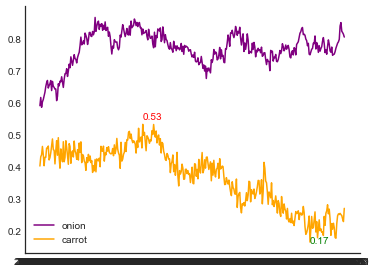

In [10]:
fig=plt.figure(figsize=(6,10))
ax=fig.add_subplot(211)
plt.plot(df_onion['date'],df_onion['price'],c='purple',label='onion')
plt.plot(df_carrot['date'],df_carrot['price'],c='orange',label='carrot')

import numpy as np
carrot_peak_index=np.argmax(df_carrot['price'])
carrot_bottom_index=np.argmin(df_carrot['price'])
plt.text(df_carrot['date'][carrot_peak_index],
         df_carrot['price'][carrot_peak_index]*1.02,
         str(round(df_carrot['price'][carrot_peak_index],2)),
         horizontalalignment='left',
         verticalalignment='bottom',
         c='red')
plt.text(df_carrot['date'][carrot_bottom_index],
         df_carrot['price'][carrot_bottom_index]*0.95,
         str(round(df_carrot['price'][carrot_bottom_index],2)),
         horizontalalignment='left',
         verticalalignment='bottom',
         c='green')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.legend()
plt.show()

In [11]:
df_onion['date'][351]

'2018-12-18'

In [12]:
# we dont have to 
# change the string date into real date   eg 2.1-->21
# we can just use the index difference
'''
import datetime
def tranform_date(val):
    lis=val.split('-')
    new_lis=[int(i) for i in lis]
    return datetime.date(new_lis[0],new_lis[1],new_lis[2])

df_onion['date']=df_onion['date'].apply(tranform_date)
df_onion['date'][351]   #(datetime.date(2018, 12, 18))

'''

"\nimport datetime\ndef tranform_date(val):\n    lis=val.split('-')\n    new_lis=[int(i) for i in lis]\n    return datetime.date(new_lis[0],new_lis[1],new_lis[2])\n\ndf_onion['date']=df_onion['date'].apply(tranform_date)\ndf_onion['date'][351]   #(datetime.date(2018, 12, 18))\n\n"

In [14]:
# the most increasing rate region of onion
max_increase=0
max_increase_bucket=-1
for i in range(0,365,50):
    if i <350:
        bucket=df_onion.iloc[i:i+50].reset_index(drop=True)
    else:
        bucket=df_onion.iloc[i:365].reset_index(drop=True)
    max_index_in_bucket=np.argmax(bucket['price'])  # return the index in the bucket, not in the whole 
    min_index_in_bucket=np.argmin(bucket['price'])
    max_diff_in_bucket=bucket['price'].max()-bucket['price'].min()
    
    if max_index_in_bucket>min_index_in_bucket:
        if max_increase<max_diff_in_bucket:
            max_increase=max_diff_in_bucket
            max_increase_bucket=i
            
            days_diff=max_index_in_bucket-min_index_in_bucket
            price_change_per_day=round(max_diff_in_bucket/days_diff,4)
            
bucket=df_onion.iloc[200:200+50].reset_index(drop=True)            
max_index_in_bucket=np.argmax(bucket['price'])
min_index_in_bucket=np.argmin(bucket['price'])

print(min_index_in_bucket,max_index_in_bucket)

4 34


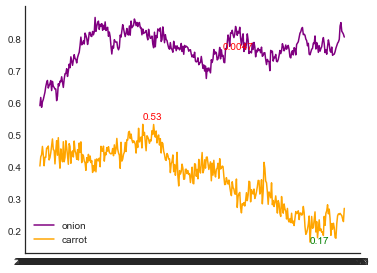

In [15]:
fig=plt.figure(figsize=(6,10))
ax=fig.add_subplot(211)
plt.plot(df_onion['date'],df_onion['price'],c='purple',label='onion')
plt.plot(df_carrot['date'],df_carrot['price'],c='orange',label='carrot')

import numpy as np
carrot_peak_index=np.argmax(df_carrot['price'])
carrot_bottom_index=np.argmin(df_carrot['price'])
plt.text(df_carrot['date'][carrot_peak_index],
         df_carrot['price'][carrot_peak_index]*1.02,
         str(round(df_carrot['price'][carrot_peak_index],2)),
         horizontalalignment='left',
         verticalalignment='bottom',
         c='red')
plt.text(df_carrot['date'][carrot_bottom_index],
         df_carrot['price'][carrot_bottom_index]*0.95,
         str(round(df_carrot['price'][carrot_bottom_index],2)),
         horizontalalignment='left',
         verticalalignment='bottom',
         c='green')

#for the region part 
plt.text(df_onion['date'][200+(min_index_in_bucket+max_index_in_bucket)/2],
         df_onion['price'][200+(min_index_in_bucket+max_index_in_bucket)/2]*1.02,
         price_change_per_day,
         horizontalalignment='left',
         verticalalignment='bottom',
         c='red')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.legend()
plt.show()

In [ ]:
# print(ax.get_xticks())
# plt.sca(ax)